In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('Cleaned_Dataset.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [3]:
encoder = LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0], str):
        df[i] = encoder.fit_transform(df[i])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052


In [4]:
X = df.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Outlet_Establishment_Year','Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)

In [5]:
rfr = RandomForestRegressor(n_estimators=100,criterion='mse',random_state=0)
rfr.fit(X_train,y_train)
print('Train Accuracy:',np.round(rfr.score(X_train,y_train), decimals=2)*100)
print('Test Accuracy:',np.round(rfr.score(X_test,y_test), decimals=2)*100)

Train Accuracy: 93.0
Test Accuracy: 54.0


In [6]:
train_score = []
test_score = []
for i in range(1,11):
    rfr = RandomForestRegressor(n_estimators=100,max_depth=i, random_state=0)
    rfr.fit(X_train,y_train)
    train_score.append(rfr.score(X_train,y_train))
    test_score.append(rfr.score(X_test,y_test))
    print('Iteration ',i,' Completed')

Text(0, 0.5, 'Score')

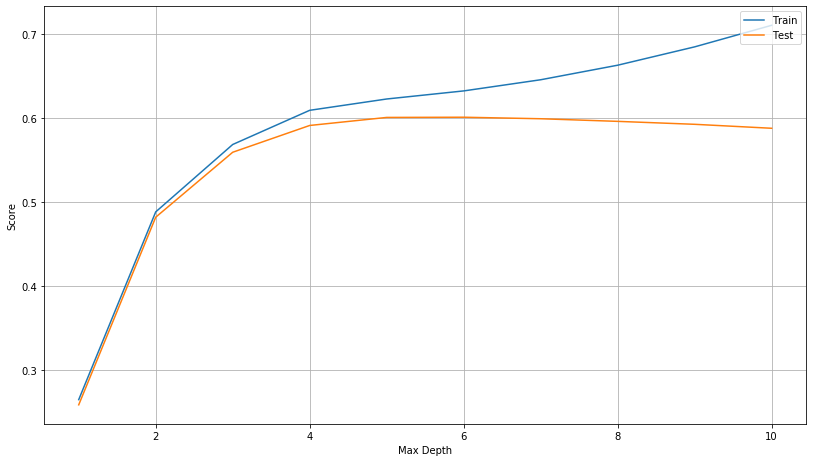

In [7]:
max_depth = range(1,11)
fig = plt.figure(figsize=[13.66,7.68])
plt.plot(max_depth, train_score)
plt.plot(max_depth, test_score)
plt.grid()
plt.legend(['Train','Test'], loc='upper right')
plt.xlabel('Max Depth')
plt.ylabel('Score')

In [8]:
train_score = []
test_score = []
for i in range(1,11):
    rfr = RandomForestRegressor(n_estimators=100, max_leaf_nodes=None, random_state=0)
    rfr.fit(X_train,y_train)
    train_score.append(rfr.score(X_train,y_train))
    test_score.append(rfr.score(X_test,y_test))
    print('Iteration ',i,' Completed')

Text(0, 0.5, 'Score')

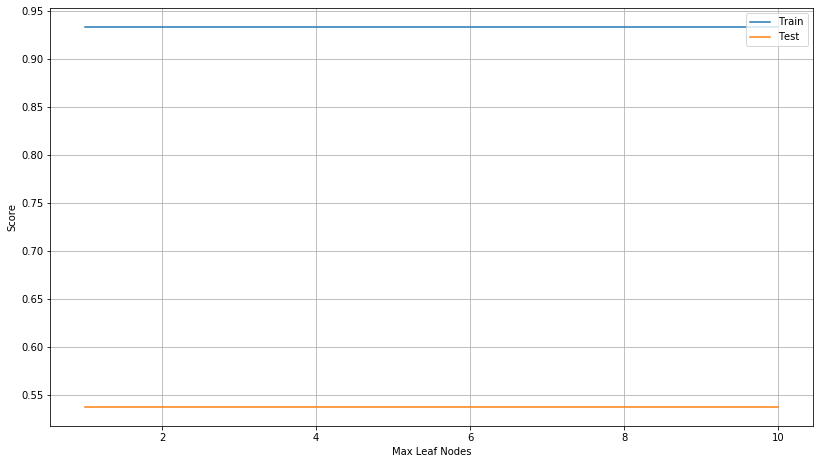

In [9]:
max_leaf_nodes = range(1,11)
fig = plt.figure(figsize=[13.66,7.68])
plt.plot(max_leaf_nodes, train_score)
plt.plot(max_leaf_nodes, test_score)
plt.grid()
plt.legend(['Train','Test'], loc='upper right')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Score')

In [10]:
rfr = RandomForestRegressor(n_estimators=100,criterion='mse',random_state=0, max_depth=4)
rfr.fit(X_train,y_train)
print('Train Accuracy:',np.round(rfr.score(X_train,y_train), decimals=2)*100)
print('Test Accuracy:',np.round(rfr.score(X_test,y_test), decimals=2)*100)

Train Accuracy: 61.0
Test Accuracy: 59.0
